### 데이터 수집

In [9]:

# 이미지 저장할 저장소 만들기
from pathlib import Path

folder_name = "data/celebrity"
subfolders = ["train", "val", "test"]

folder = Path(folder_name)
for dir in subfolders:
    dir_path = folder / dir
    if not dir_path.exists():
        dir_path.mkdir(parents=True, exist_ok=True)

celeb_list = ["카리나", "아이유", "수지"]

    

In [2]:
# 데이터 수집 - bing_image_downloader 패키지
celeb_list = ["카리나", "아이유", "수지"]

## 1개 이미지 다운로드 테스트
from bing_image_downloader import downloader

downloader.download(
    "카리나",
    limit=1,
    output_dir=folder_name,
    adult_filter_off=True,
    force_replace=False,
    timeout=60
)


[%] Downloading Images to c:\wanted\practice_DL\data\celebrity\카리나


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://img.hankyung.com/photo/202402/BF.35878118.1.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.


In [ ]:
# 각각 100개씩 다운로드
for keyword in celeb_list:
    downloader.download(
        query=keyword,
        limit=100,
        output_dir=folder_name,
        adult_filter_off=True,
        force_replace=False,
        timeout=60
    )


[%] Downloading Images to c:\wanted\practice_DL\data\celebrity\카리나


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://img.hankyung.com/photo/202402/BF.35878118.1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://pbs.twimg.com/profile_images/1433463773856079881/34gC8TAh_400x400.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ytimg.com/vi/tZixREYOIZQ/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ytimg.com/vi/kpEbQOzJb00/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.ytimg.com/vi/5qcA6xKRcn8/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/236x/09/63/7b/09637bdc3f371e6ceeeef0c5577b2be5.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.ytimg.com/vi/yWm4PtbdxUA/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://i.ytimg.com/vi/e1FlHbGUw9I/maxresdefault.jpg
[%

In [15]:
import shutil
import random
from pathlib import Path

SEED = 1030
random.seed(SEED)

source_folder = Path("./data/celebrity")  # 기존 데이터 위치

train_folder = source_folder / "train"
val_folder = source_folder / "val"
test_folder = source_folder / "test"

print("클래스 목록:", celeb_list)
for split_folder in [train_folder, val_folder, test_folder]:
    for celeb in celeb_list:
        (split_folder / celeb).mkdir(parents=True, exist_ok=True)


train_cnt, val_cnt, test_cnt = 70, 10, 20  # 각 클래스당 이미지 개수

for celeb in celeb_list:
    celeb_path = source_folder / celeb
    image_files = list(celeb_path.glob("*"))  # jpg 이미지 파일 리스트
    random.shuffle(image_files)  # 이미지 랜덤 셔플

    train_files = image_files[:train_cnt]
    val_files = image_files[train_cnt:train_cnt + val_cnt]
    test_files = image_files[train_cnt + val_cnt:train_cnt + val_cnt + test_cnt]

    for file in train_files:
        shutil.copy(file, train_folder / celeb / file.name)

    for file in val_files:
        shutil.copy(file, val_folder / celeb / file.name)
        
    for file in test_files:
        shutil.copy(file, test_folder / celeb / file.name)

print(f"Train 데이터 개수: {sum(len(list((train_folder / c).glob('*'))) for c in celeb_list)}")
print(f"Validation 데이터 개수: {sum(len(list((val_folder / c).glob('*'))) for c in celeb_list)}")
print(f"Test 데이터 개수: {sum(len(list((test_folder / c).glob('*'))) for c in celeb_list)}")





클래스 목록: ['카리나', '아이유', '수지']
Train 데이터 개수: 210
Validation 데이터 개수: 30
Test 데이터 개수: 60


### 데이터 불러오기

클래스 목록: ['수지', '아이유', '카리나']
Train 데이터 개수: 210
Validation 데이터 개수: 30
Test 데이터 개수: 60
배치 크기: torch.Size([10, 3, 224, 224]), 라벨 크기: torch.Size([10])


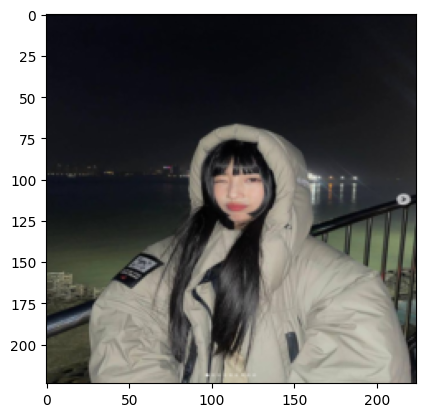

Label: 수지


In [61]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import torch
import numpy as np

torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)


data_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]
)

# ImageFolder를 사용하여 데이터 로드
train_dataset = ImageFolder(root="data/celebrity/train", transform=data_transform)
val_dataset = ImageFolder(root="data/celebrity/val", transform=data_transform)
test_dataset = ImageFolder(root="data/celebrity/test", transform=data_transform)

# DataLoader 설정
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

print(f"클래스 목록: {train_dataset.classes}")
print(f"Train 데이터 개수: {len(train_dataset)}")
print(f"Validation 데이터 개수: {len(val_dataset)}")
print(f"Test 데이터 개수: {len(test_dataset)}")

data_iter = iter(train_loader)
images, labels = next(data_iter)
print(f"배치 크기: {images.shape}, 라벨 크기: {labels.shape}")

# 첫 번째 이미지 확인
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # 정규화 되돌리기
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(images[0])
print(f"Label: {test_dataset.classes[labels[0]]}")


### 모델 설정하기

In [166]:
from torchvision.models.vgg import vgg16
import torch 
from torchsummary import summary 

model = vgg16(weights='IMAGENET1K_V1')
# model = vgg16(pretrained=False)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

summary(model, (3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

In [167]:
for p in model.parameters():  # freeze 기능
    # print(p)
    p.requires_grad = False

In [168]:
import torch.nn as nn 

myclassifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=4096, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=4096, out_features=256, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(in_features=256, out_features=32, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=32, out_features=3, bias=True)
)

model.classifier = myclassifier
model = model.to(device)

### 학습

In [ ]:
from torch.utils.tensorboard import SummaryWriter
import time
import torch.optim as optim 

epochs = 50
batch_size = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

loss_history = {"train": [], "val": []}
acc_history = {"train": [], "val": []}

best_loss_val = float('inf')
last_loss_val = float('inf')
patience = 5
patience_cnt = 0

log_dir = f"log/celebrity/{time.strftime('%Y%m%d-%H%M%S')}"
writer = SummaryWriter(log_dir)

for epoch in range(epochs):
    #### train ####
    model.train() 

    loss_train = 0.0
    corr_train = 0
    for data, target in train_loader:
        # GPU 보내기
        data = data.to(device)
        target = target.to(device)

        # 학습
        optimizer.zero_grad()
        yhat = model(data)
        loss = criterion(yhat, target)
        loss.backward()
        optimizer.step()

        # loss, correct 계산
        loss_train += loss.item() * batch_size
        corr_train += (yhat.argmax(dim=1) == target).sum().item()

    # loss, acc 저장
    train_loss = loss_train / len(train_dataset)
    train_accuracy = corr_train / len(train_dataset)
    
    loss_history["train"].append(train_loss)
    acc_history["train"].append(train_accuracy)

    #### validation ####
    model.eval()

    loss_val = 0.0
    corr_val = 0
    for data, target in val_loader:
        # GPU 보내기
        data = data.to(device)
        target = target.to(device)

        # 예측
        with torch.no_grad():
            pred = model(data)
            loss_val += criterion(pred, target).item() * batch_size
            corr_val += (pred.argmax(dim=1) == target).sum().item()

    # loss, acc 저장
    val_loss = loss_val / len(val_dataset)
    val_accuracy = corr_val / len(val_dataset)
    
    loss_history["val"].append(val_loss)
    acc_history["val"].append(val_accuracy)
    
    writer.add_scalars("Loss", {
        "Train": train_loss,
        "Validation": val_loss,
        },
        epoch
    )
    
    writer.add_scalars("Accuracy", {
        "Train": train_accuracy,
        "Validation": val_accuracy,
        },
        epoch
    )

    # Early Stopping
    if loss_val < last_loss_val:
        patience_cnt = 0
        
    else:
        patience_cnt += 1
        print(f"개선 없음 - Early Stopping 카운터: {patience_cnt}/{patience}")
        if patience_cnt == patience:
            print("Early Stopping!")
            break
    last_loss_val = loss_val
    
    # Best 모델 저장
    if loss_val < best_loss_val:
        best_loss_val = loss_val
        model_name = f"vgg_16_{epoch}"
        torch.save(model.state_dict(), f"{model_name}.pth")
        print(f"best model saved:", model_name)
        
    # 출력
    # if epoch % 1 == 0:
        # print(f"Epoch: {epoch}, Train Loss: {loss_train / len(train_data):.6f}, Train acc: {corr_train / len(train_data):.6f} Validation Loss: {loss_val / len(val_loader):.4f}, Validation acc: {corr_val / len(val_data):.4f}")
    print(
        f"Epoch: {epoch}\t"
        f"Train Loss: {train_loss:.4f}, Train Acc: {100 * train_accuracy:.2f}% | "
        f"Val Loss: {val_loss:.4f}, Val Acc: {100 * val_accuracy:.2f}%"
    )


writer.close()

best model saved: vgg_16_0
Epoch: 0	Train Loss: 1.1045, Train Acc: 33.81% | Val Loss: 1.1019, Val Acc: 36.67%
best model saved: vgg_16_1
Epoch: 1	Train Loss: 1.0604, Train Acc: 50.95% | Val Loss: 1.0999, Val Acc: 33.33%
개선 없음 - Early Stopping 카운터: 1/5
Epoch: 2	Train Loss: 0.9962, Train Acc: 64.76% | Val Loss: 1.1028, Val Acc: 33.33%
best model saved: vgg_16_3
Epoch: 3	Train Loss: 0.9253, Train Acc: 72.38% | Val Loss: 1.0985, Val Acc: 46.67%
best model saved: vgg_16_4
Epoch: 4	Train Loss: 0.8519, Train Acc: 77.14% | Val Loss: 1.0898, Val Acc: 53.33%
best model saved: vgg_16_5
Epoch: 5	Train Loss: 0.7493, Train Acc: 88.57% | Val Loss: 1.0833, Val Acc: 53.33%
best model saved: vgg_16_6
Epoch: 6	Train Loss: 0.6598, Train Acc: 88.10% | Val Loss: 1.0825, Val Acc: 46.67%
best model saved: vgg_16_7
Epoch: 7	Train Loss: 0.5784, Train Acc: 91.90% | Val Loss: 1.0781, Val Acc: 50.00%
개선 없음 - Early Stopping 카운터: 1/5
Epoch: 8	Train Loss: 0.5024, Train Acc: 94.76% | Val Loss: 1.0791, Val Acc: 46.67%


### 예측
#### 성능평가

In [170]:
# 예측 -- 이 모델의 성능을 평가하기 위한 코드
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

model.eval()

corr_test = 0
for data, target in test_loader:
    # GPU 보내기
    data = data.to(device)
    target = target.to(device)

    # 예측
    with torch.no_grad():
        pred = model(data)
        corr_test += (pred.argmax(dim=1) == target).sum().item()

print(corr_test / len(test_dataset))

0.65


<Figure size 600x400 with 0 Axes>

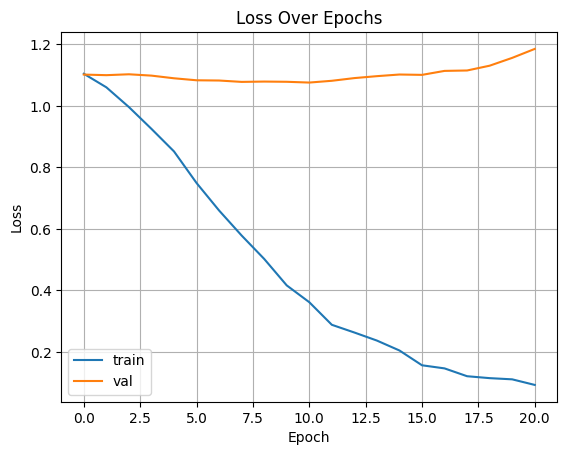

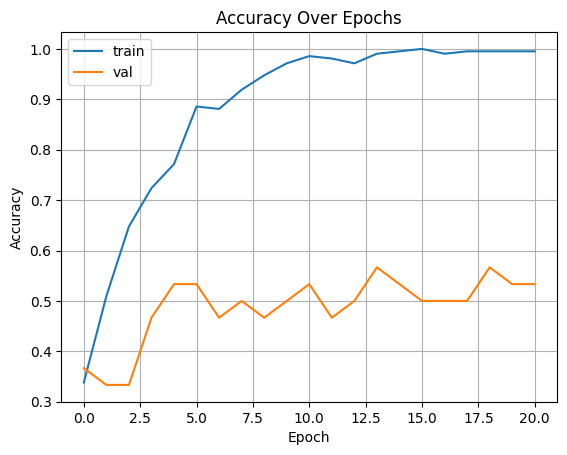

In [171]:
import matplotlib.pyplot as plt
import pandas as pd

# 학습 곡선 시각화
plt.figure(figsize=(6, 4))

# Train Loss와 Validation Loss 각각 그리기
loss_data = pd.DataFrame(loss_history)

loss_data.plot()
# loss_data[["train_loss", "val_loss"]].plot()

# 그래프 제목 및 라벨 설정

plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()  # 그리드 추가
plt.show()

acc_data = pd.DataFrame(acc_history)
acc_data.plot()
# loss_data[["train_acc", "val_acc"]].plot()

# 그래프 제목 및 라벨 설정
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()  # 그리드 추가
plt.show()

#### 새로운 이미지 분류

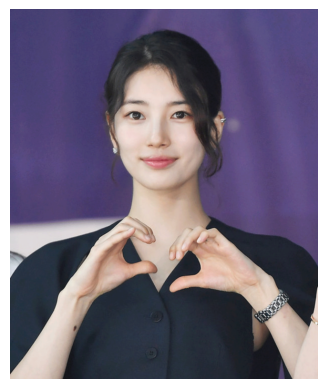

예측된 클래스: 수지
이미지의 예측 클래스: 수지


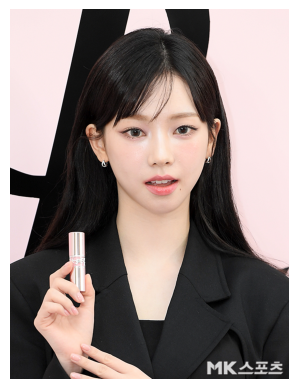

예측된 클래스: 아이유
이미지의 예측 클래스: 아이유


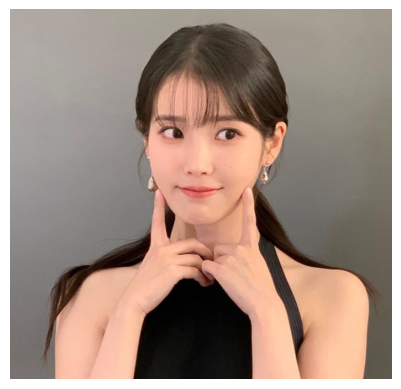

예측된 클래스: 아이유
이미지의 예측 클래스: 아이유


In [174]:
import torch
import requests
import numpy as np
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

model = vgg16(weights='IMAGENET1K_V1')
myclassifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=4096, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=4096, out_features=256, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(in_features=256, out_features=32, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=32, out_features=3, bias=True)
)
model.classifier = myclassifier
model.load_state_dict(torch.load("vgg_16_10.pth"))  # 가중치 로드
model.to(device)
model.eval()

# 클래스 이름 로드
class_names = train_dataset.classes  # 학습 데이터에서 클래스 정보 가져오기

def classify_image_from_url(image_url):
    response = requests.get(image_url, stream=True)
    image = Image.open(response.raw).convert("RGB")  # RGB 변환

    plt.imshow(image)
    plt.axis("off")
    plt.show()

    # 이미지 전처리
    image = data_transform(image).unsqueeze(0).to(device)  # 배치 차원 추가 후 GPU로 이동

    # 모델 예측
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    # 예측 결과 출력
    predicted_class = class_names[predicted.item()]
    print(f"예측된 클래스: {predicted_class}")

    return predicted_class

# 테스트 (URL을 입력해서 이미지 분류)
image_url = [
    "https://img.news-wa.com//img/upload/2024/11/12/NWC_20241112144306.gif.webp",
    "https://pimg.mk.co.kr/news/cms/202404/24/news-p.v1.20240424.bc3a15b9db35443599b06ef07cc26f8a_P1.jpg",
    "https://autocarnews.co.kr/wp-content/uploads/2024/09/2-2-optimized.png"
]
for iu in image_url:
    predicted_class = classify_image_from_url(iu)
    print(f"이미지의 예측 클래스: {predicted_class}")
